<a href="https://colab.research.google.com/github/Razirazis/python/blob/main/unsupervised_learning_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
# Load the dataset
file_path = 'fish.csv'  # Replace with your file path
columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
fish_data = pd.read_csv(file_path, names=columns)

In [8]:
# Select 'Weight' and 'Length1' columns
X = fish_data[['Weight', 'Length1']].dropna()

In [9]:
# Standardize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Elbow method to determine the optimal number of clusters for K-means
inertia = []
K_range = range(1, 11)

In [11]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

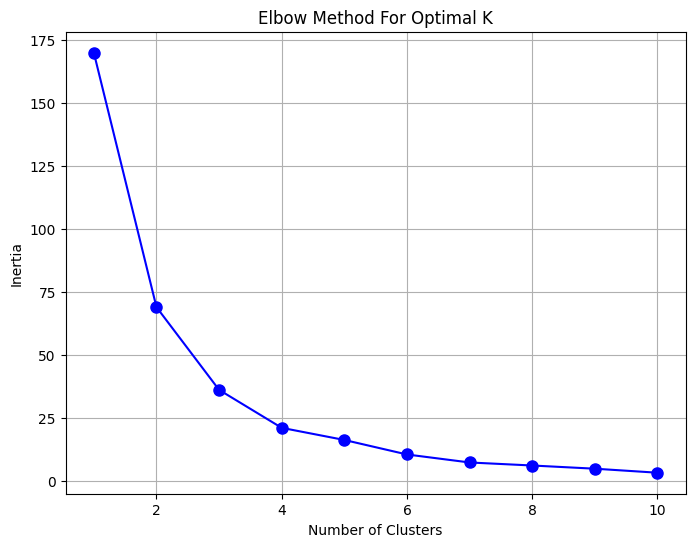

In [12]:
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [13]:
# Perform hierarchical clustering using the 'Ward' method
linked = linkage(X_scaled, method='ward')

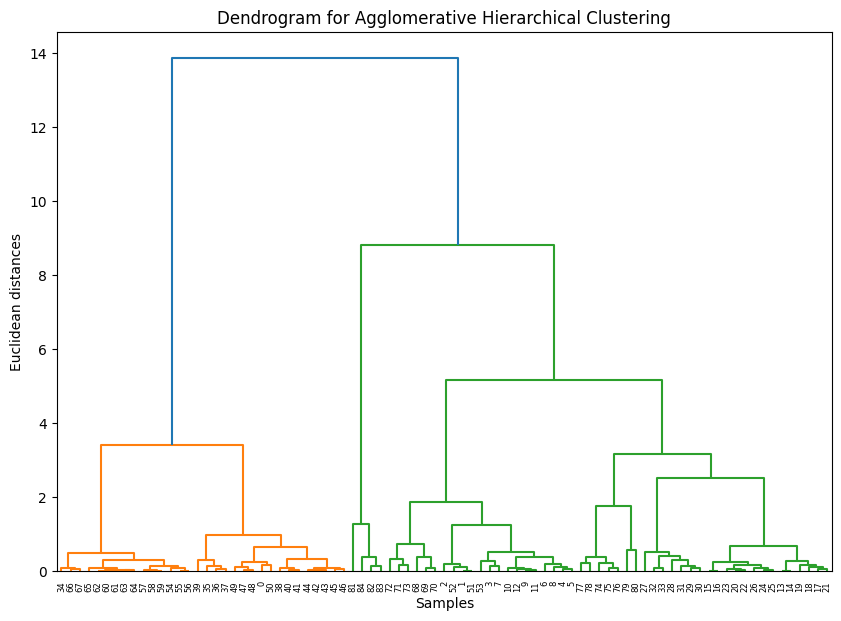

In [14]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

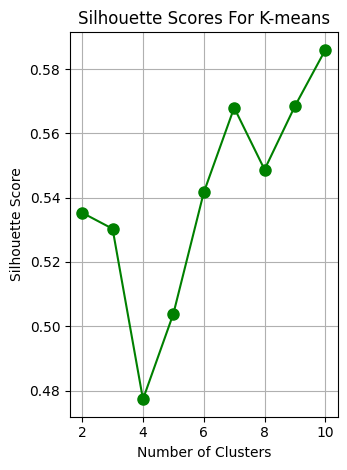

In [18]:

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', markersize=8)
plt.title('Silhouette Scores For K-means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Perform hierarchical clustering using the 'Ward' method
linked = linkage(X_scaled, method='ward')


In [24]:
# Optionally, perform Agglomerative Clustering with the optimal number of clusters (e.g., 3)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

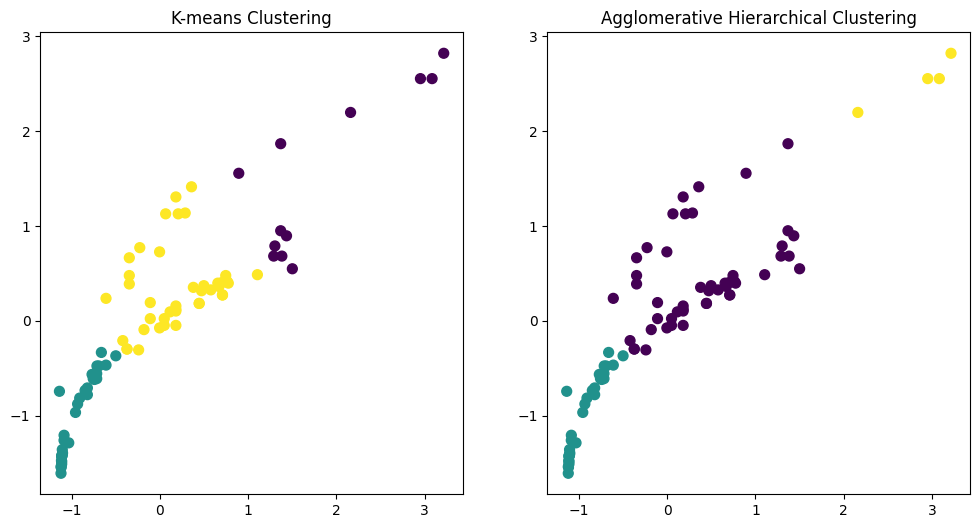

In [27]:
# Scatter plot to visualize clusters (for K-means and Agglomerative)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# K-means final clustering result with k=3 (or any optimal value you determined)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax1.set_title('K-means Clustering')

# Agglomerative clustering result with 3 clusters
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', s=50)
ax2.set_title('Agglomerative Hierarchical Clustering')

plt.show()
